In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle
from sklearn import svm
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


In [2]:
!pwd
#!rm -rf Gestures

/content


In [3]:
!git clone https://github.com/KuldeepDileep/Gestures.git

Cloning into 'Gestures'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [4]:
import zipfile
with zipfile.ZipFile('/content/Gestures/Gestures-Images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Gestures')

In [5]:
TrainDir = '/content/Gestures/Gestures-Images/ASL_Images'

count=0
current_id = 0
label_ids = {}
x_train = []
y_labels= []

image_train = []
label_train =[]


#---------------------------------------Extracting Train Images-----------------------------------------
for root, dirs, files in os.walk(TrainDir):
    for file in files:
        if file.endswith("png") or  file.endswith("jpeg") or file.endswith("jpg"):
            count+=1
            path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(path)).replace(" ",",").lower()
            label = os.path.basename(root).replace(" ",",").lower()
            if not label in label_ids: #if the current label is not in dictionsry we save it with the corresponding current_id i.e 0,1,2
                label_ids[label] = current_id
                current_id +=1
            id_ = label_ids[label]
            label_train.append(id_)

            
            pil_image =  Image.open(path) #Opening the image using Image object and converting it into Gray
            pil_image = pil_image.resize((224,224))
            pil_image = pil_image.convert("RGB")
            image_array =  np.array(pil_image, "uint8") #converting the image into a numpy array
            image_train.append(image_array)
            #print(image_array)
print("----------------------------Label_ids----------------------------------")
print(label_ids)
print(label_ids)
print(count)

----------------------------Label_ids----------------------------------
{'hello': 0, 'my': 1, 'name': 2}
{'hello': 0, 'my': 1, 'name': 2}
600


In [6]:
image_train = np.asarray(image_train)
label_train = np.asarray(label_train)
x_train = image_train
y_train = label_train
print(image_train[0].shape)
print(y_train.shape)
print(x_train.shape)

(224, 224, 3)
(600,)
(600, 224, 224, 3)


Spliting data:

In [7]:
#-----------------------------------------------Test and Train Spli--------------------------------------
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(480, 224, 224, 3)
(120, 224, 224, 3)


Data Normalization:

In [8]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

One-Hot Encoding:

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(480, 224, 224, 3)
(480, 3)
(120, 224, 224, 3)
(120, 3)


Convolutional Neural Network (CNN):

In [11]:
epochs = 500
num_classes = 3
CNN_model = Sequential()

VGG16 (Pretrained CNN based model with 12 layers):

In [12]:
vgg16_model = keras.applications.vgg16.VGG16()
#vgg16_model = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 1)))
vgg16_model.summary()
# print("#----------------VGG16 Summary-------------#")
for layer in vgg16_model.layers:
  CNN_model.add(layer)
# print("#----------------CNN Summary----------------#")
CNN_model.summary()
CNN_model.layers.pop()
for layer in CNN_model.layers:
  layer.trainable = False     #Freezing layers so that these are not trained
CNN_model.add(Dense(num_classes, activation='softmax'))
# print("#----------------CNN Summary--------#")
CNN_model.summary()

553467904/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [13]:
CNN_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr = 0.0001),metrics=['accuracy'])
history = CNN_model.fit(x_train, y_train,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 480 samples, validate on 120 samples
Epoch 1/500
480/480 [==============================] - 17s 35ms/step - loss: 1.0986 - accuracy: 0.3375 - val_loss: 1.0988 - val_accuracy: 0.3167
Epoch 2/500
480/480 [==============================] - 6s 12ms/step - loss: 1.0985 - accuracy: 0.3375 - val_loss: 1.0988 - val_accuracy: 0.3167
Epoch 3/500
480/480 [==============================] - 6s 12ms/step - loss: 1.0985 - accuracy: 0.3375 - val_loss: 1.0988 - val_accuracy: 0.3167
Epoch 4/500
480/480 [==============================] - 6s 12ms/step - loss: 1.0984 - accuracy: 0.3375 - val_loss: 1.0988 - val_accuracy: 0.3167
Epoch 5/500
480/480 [==============================] - 6s 12ms/step - loss: 1.0984 - accuracy: 0.3375 - val_loss: 1.0988 - val_accuracy: 0.3167
Epoch 6/500
480/480 [==============================] - 6s 12ms/step - loss: 1.0983 - accuracy: 0.3375 - val_loss: 1.0988 - val_accuracy: 0.3167
Epoch 7/500
480/480 [==============================] - 6s 12ms/step - loss: 1.0983 - accu

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


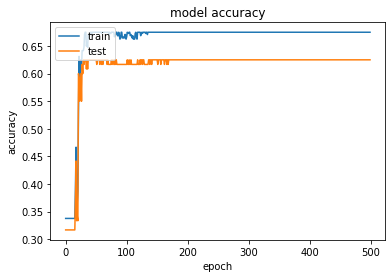

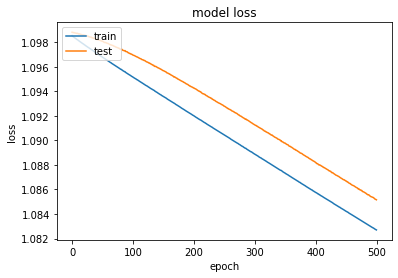

In [14]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
result = CNN_model.evaluate(x_train, y_train)
print('train loss, train acc:', result)
result2 = CNN_model.evaluate(x_test, y_test)
print('test loss, test acc:', result2)

480/480 [==============================] - 5s 10ms/step
train loss, train acc: [1.082673152287801, 0.675000011920929]
120/120 [==============================] - 1s 10ms/step
test loss, test acc: [1.085159722963969, 0.625]


In [16]:
# serialize model to YAML
model_yaml = CNN_model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
CNN_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Prediction:

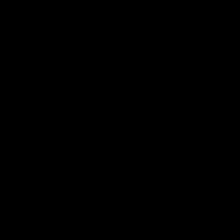

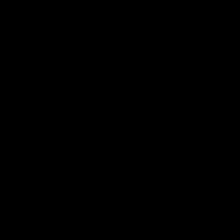

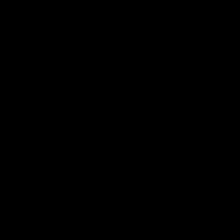

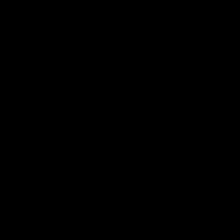

[1 1 1 1]


In [21]:
use_samples = [1, 2, 3, 4]
samples_to_predict = []
# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = x_train[sample]
  samples_to_predict.append(reshaped_image)
  cv2_imshow(reshaped_image)
samples_to_predict = np.asarray(samples_to_predict)
predictions = CNN_model.predict(samples_to_predict)
classes = np.argmax(predictions, axis = 1)
pred_labels = classes
print(classes)

In [22]:
for i in use_samples:
    count=0
    for j in y_train[i]:
      if j==1:
        print(count)
        break
      else:
        count+=1

1
2
2
2
